---

# **EDKP 616: Individual Reading** #


---
##  **Section 2: Fundamentals of IMUs** ##
---

Due to the limitations of optical motion capture systems (see Section 1), wearable sensors have been increasingly applied to biomechanical investigations. One such sensor is the inertial measurement unit (IMU), which typically contains three orthogonal gyroscopes, three orthogonal accelerometers, and three orthogonal magnetometers. By fusing the outputs of these three sensors, biomechanists have successfully tracked and output segment orientations. Due to the IMU’s low cost and small size, it is an ideal tool for collecting kinematics in outdoor environments and outside of biomechanical laboratories.

The following notebook covers the fundamental principles which underpin collecting sensor orientation using IMUs. Particular emphasis is placed on why each sensor of the IMU provides useful data to calculate sensor orientation, and why methods which fuse sensor data are required to achieve valid results.

### *Summary of IMU Sensors:* ###

#### *Gyroscopes:* ####

Gyroscopes aim to quantify the angular orientation of a body in space. Many mechanisms have been proposed to accomplish them. However, the recent development of micro-electro-mechanical systems (MEMS) gyroscopes are currently the most prevalent in wearable sensors and are used in the Xsens dots. These gyroscopes leverage the Coriolis effect, which explains that when rotating at an angular velocity, w, a mass, m, moving with a velocity of v experiences a Force (Woodman, 2007):

<br>


<center>
<img src="figures/gyro_figure.png" alt="Accelerometer Figure" width="400">
</center>
<p><strong>Figure 1.</strong> Visualization of MEMS gyroscope mechanics (adapted from Woodman, 2007).</p>

<br>
<div style="text-align: center;">
$F_{c} = -2 m (\omega \times \upsilon)$
</div>
<br>
<br>
To measure this, a mass is vibrated along a chosen axis. As a result, when the sensor is rotated, a secondary vibration can be sensed perpendicular to the driving axis. These secondary rotations can be used to quantify angular velocity and orientation, and the combination of three orthogonal gyroscopes enables these to be measured across all three dimensions.


<br>

<br>

Despite their prevalence, MEMS gyroscopes are not without their disadvantages. The major disadvantage of MEMS gyroscopes is that the measured orientation obtained from the sensor drifts over time. At a high level, this happens because MEMS gyroscopes measure angular velocity, and integration is needed to obtain orientation values. As a result, any error or bias in the system is integrated and causes drift and errors in the signal, which grow over time. Furthermore, even when bias is removed, random walk will occur in the sensor's outputs. Therefore, though gyroscopes provide useful orientation regarding the sensor's angular orientation, its output cannot be used alone. Woodman 2007 provides a very good summary of the sources of these errors (Table 1.)

**Table 1.** Sources of errors from gyroscopes (from [Woodman, 2007](https://doi.org/10.48456/tr-696))
<center>

|     **Error Type**      |                               **Description**                               |                          **Result of Integration**                           |
|:-----------------------:|:---------------------------------------------------------------------------:|:----------------------------------------------------------------------------:|
|        **Bias**         |              A constant bias in the gyroscopes's output signal              |                       A steadily growing angular error                       |
|     **White Noise**     |                  White noise with some standard deviation                   |  A random walk with growing standard deviation with the square root of time  |
| **Temperature Effects** |                     Temperature dependent residual bias                     | Any residual bias causes an error in position which grows linearly with time |
|     **Calibration**     | Deterministic errors in scale factors, alignments and gyroscope linearities |        Position drift proportional to the rate and duration of motion        |
|  **Bias Instability**   |          Bias fluctuations, usually modelled as a bias random walk          |                       A second-order walk in position                        |

</center>
<br>
<br>

#### *Linear accelerometers:* ####

Three orthogonal linear accelerometers are leveraged in IMUs to determine the acceleration of a body in three dimensions. Accelerometers apply Newton’s second law to measure linear acceleration. As a review, the law states that the force that an object can produce is proportional to its mass and acceleration (Eq. 2). Therefore, when a known mass within the accelerometer produces a force because of segment movement, the linear acceleration of the segment can be calculated.

<br>


<center>
<img src="figures/acc_figure.png" alt="Accelerometer Figure" width="400">
</center>
<p><strong>Figure 2.</strong> Visualization of MEMS accelerometer mechanics.</p>

<div style="text-align: center;">
$$
F = m \times a
$$
</div>
<br>


The major downsides to the use of accelerometers are that they must be integrated twice to get to the sensor position. As such, they are especially susceptible to error and noise in the signal. Furthermore, like gyroscopes, second-order random walk is also present in the sensor's outputs. Like gyroscopes, acceleromater data is also unable to be used alone to accurately determine sensor orientaiton. Provided below are the main sources of error from an accelerometer.

**Table 2.** Sources of errors from accelerometers (from [Woodman, 2007](https://doi.org/10.48456/tr-696))
<center>

|     **Error Type**      |                                 **Description**                                 |                         **Result of Double Integration**                         |
|:-----------------------:|:-------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------:|
|        **Bias**         |              A constant bias in the accelerometer's output signal              |                     A quadratically growing position error                       |
|     **White Noise**     |                    White noise with some standard deviation                     |            A second-order random walk with growing standard deviation            |
| **Temperature Effects** |                       Temperature dependent residual bias                       | Any residual bias causes an error in position which grows quadratically with time |
|     **Calibration**     | Deterministic errors in scale factors, alignments and accelerometer linearities |   Position drift proportional to the squared rate and duration of acceleration   |
|  **Bias Instability**   |            Bias fluctuations, usually modelled as a bias random walk            |                          A third-order walk in position                          |

</center>

<br>
<br>

#### *Magnetometers:* ####

IMUs also contain three orthogonal magnetometers to measure Earth's magnetic field vector, used to correct for drift in the sensor's heading/yaw angle. Though the exact magnetometer technology used in the Xsens DOT is not publicly specified, modern MEMS sensors commonly use magnetoresistive sensing. These sensors use thin ferromagnetic films whose electrical resistance changes in response to external magnetic fields. When a magnetic field is present, it alters the magnetization direction within the material, changing how electrons scatter as they flow through the conductor, which in turn changes the measured resistance. Sensor fusion algorithms can use this information to help detect drift.



<br>
<center>
<img src="figures/mag_figure.png" alt="Magnetometer Figure" width="300">
</center>
<p><strong>Figure 3.</strong> Visualization of MEMS Magnetometer mechanics.</p>

The figure shown above displays the basic principle of magnetic field detection in MEMS sensors. Different technologies (Hall effect, magnetoresistive, Lorentz force) measure different effects, but all rely on the interaction between current, magnetic fields, and charge as shown above.

Though magnetometers are useful in correcting for sensor drift, they are susceptible to error when exposed to magnetic fields other than Earth's. For example, if a magnet is moved around the IMU sensor, the magnetometer would incorrectly sense changes in heading.

*Note*: XSens dots were used to collect all data presented in the following notebook. This sensor uses a strapdown system. Therefore, the data shown in the following notebook is relative to the sensor's coordinate system.


In [21]:
from biomechzoo.conversion.csv2zoo_data import csv2zoo_data
from utils.imu_functions import filter_data, plot_xyz, integrate, zero_mean,visualize

#### Visualizing Sources of Error: ####

To display the disadvantages of gyroscopes, accelerometers, and magnetometers, tailored collections were performed targeting each system's weakness.

*Gyroscope Error Visualization:*

As mentioned above, gyroscopes are prone to the accumulation of error over time. Therefore, to determine the magnitude of error in the XSens Dot's gyroscopes, a continuous seven hour collection was completed. The sensor remained static on a desk for the duration of the collection. Therefore, any rotation sensed throughout the collection can be directly attributed to drift.

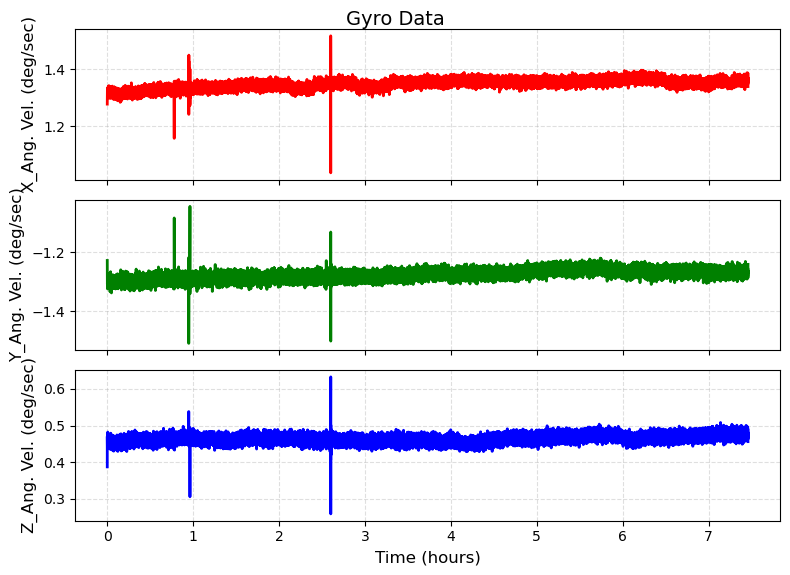

In [2]:
# Load the seven hour collection file
data_gyr = csv2zoo_data('data/overnight.csv')

# Filter the data using a low pass filter
filtered_gyro_data = filter_data(data_gyr, cutoff = 1, sample_frequency= 30, sensor_type = 'gyro')

# Visualize the data
plot_xyz(filtered_gyro_data, div_time = 108000, tlabel = 'hours', ylabel="Ang. Vel. (deg/sec)", sensor_type = 'gyro')

Figure 4. Resulting data from a static gyroscope over 7 hours

MEMS gyroscopes output angular velocity (in degrees/ second). Though no drift can be easily seen in the raw data, the integral of the signal must be taken to gain any insight on angular orientation.

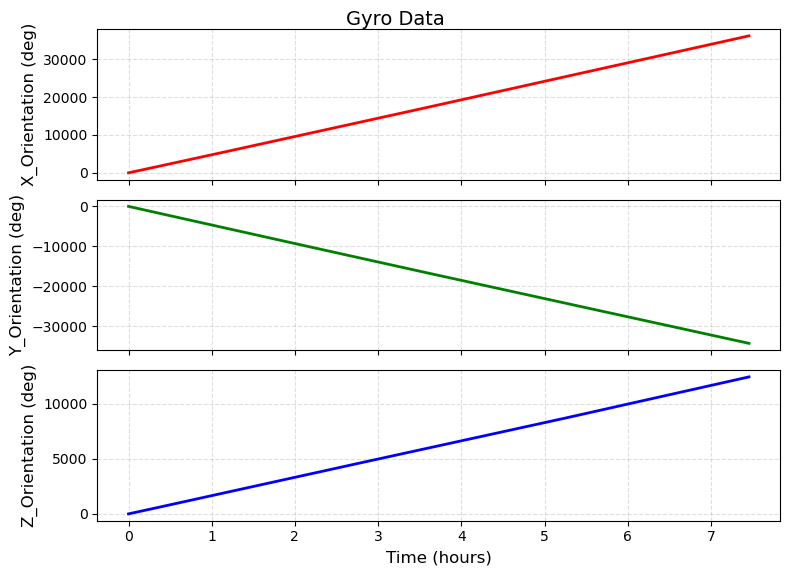

In [3]:
# Take the first integral to obtain orientation from angular velocity
int_gyro_data = integrate(filtered_gyro_data, frequency = 30, times = 1, sensor_type = 'gyro')

# Visualize the data
plot_xyz(int_gyro_data, div_time = 108000, tlabel = 'hours', ylabel='Orientation (deg)',sensor_type='gyro')

Figure 5. Angular orientation output from integrating raw gyroscope signal

It is obvious that unreliable data is achieved by taking the integral of the raw signal. In accordance to the common error sources in gyroscopes outlined in Table 1, we see an angular error which grows linearly with time. This is due to the bias in the raw signal. Indeed, when referencing Figure 4. a bias can clearly be identified as each signal does not have a mean of zero degrees per second. The current example highlights the need to remove signal bias before integrating.

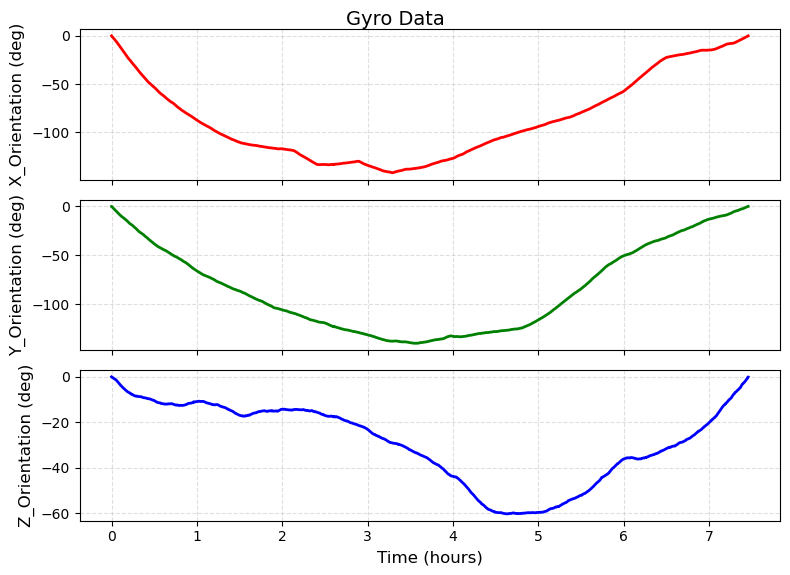

In [4]:
# Remove the bias from the signal
zero_mean_gyro = zero_mean(filtered_gyro_data)

# Take the first integral to obtain orientation from angular velocity
int_gyro_data = integrate(zero_mean_gyro, frequency = 30, times = 1, sensor_type = 'gyro')

# Visualize the data
plot_xyz(int_gyro_data, div_time = 108000, tlabel = 'hours', ylabel='Orientation (deg)',sensor_type='gyro')

Figure 6. Angular orientation output from integrating the zero-mean gyroscope signal

Though there is still some obvious drift in the bias, this is a large improvement when compared to the results achieved from integrating the raw signal. There is expected to be some drifting that occurs in the signal due to white noise artifacts and bias instability. According to this example, these can accumulate quite quickly. In the application in our lab, however, where walking trials are quite short, the effects of these drifts are minor. Nevertheless, sensor fusion algorithms should be implemented to get more reliable orientation data.

*Accelerometer Error Visualization:*

MEMS accelerometers are prone to many of the same errors previously visualized within MEMS gyropscopes (e.g., bias and noise). However, accelerometer signals must be integrated twice in order to get position, making these errors accumulate even quicker. To visualize the errors associated with MEMS accelerometers, a one-minute static trial was completed with the sensor laying on a desk. Therefore, any change in position sensed throughout the collection can be directly attributed to sensor errors.


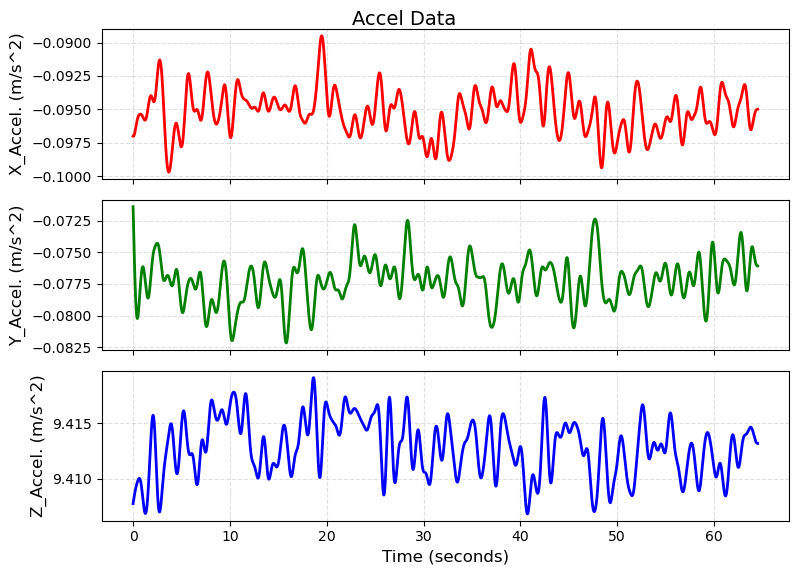

In [5]:
# Load the example file
data_acc = csv2zoo_data('data/still_1min.csv')

# Filter the data to get rid of obvious outliers and noise
filtered_acc_data = filter_data(data_acc, cutoff = 1, sample_frequency = 120, sensor_type = 'accel')

# Visualize the data
plot_xyz(filtered_acc_data, div_time = 120, tlabel = 'seconds', ylabel="Accel. (m/s^2)", sensor_type = 'accel')

Figure 7. Raw accelerometer data achieved during a static one-minute collection

The base outputs of IMU accelerometers during static conditions are visualized above. The figure displays that, with no motion, there is minimal acceleration in the X and Y directions, while there is a 1 g accleration along the Z axis corresponding to the acceleration due to gravity.

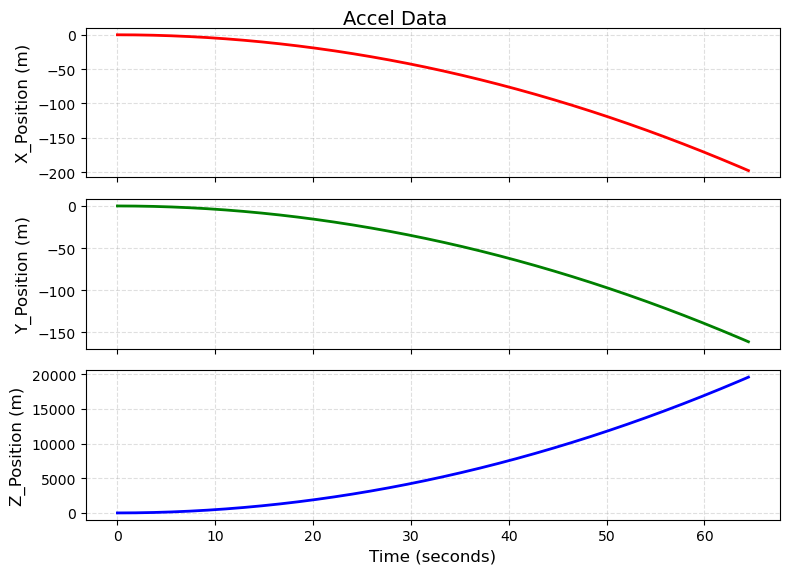

In [6]:
# Take the second integral to obtain positon from acceleration
int_acc_data = integrate(filtered_acc_data, frequency = 120, times = 2, sensor_type = 'accel')

# Visualize the data
plot_xyz(int_acc_data, div_time = 120, tlabel = 'seconds', ylabel='Position (m)', sensor_type='accel')

Figure 8. Resulting position obtained from integrating the raw acceleration signal twice

As with the example shown in Figure 3, the accelerometer also has compounding positional error with time due to signal bias, the bias can be confirmed by visually inspecting the mean of the signal shown in Figure 7. This error is expected for biased signal are outlined in Table 2. In an effort to produce a more usable signal, the bias can be removed.

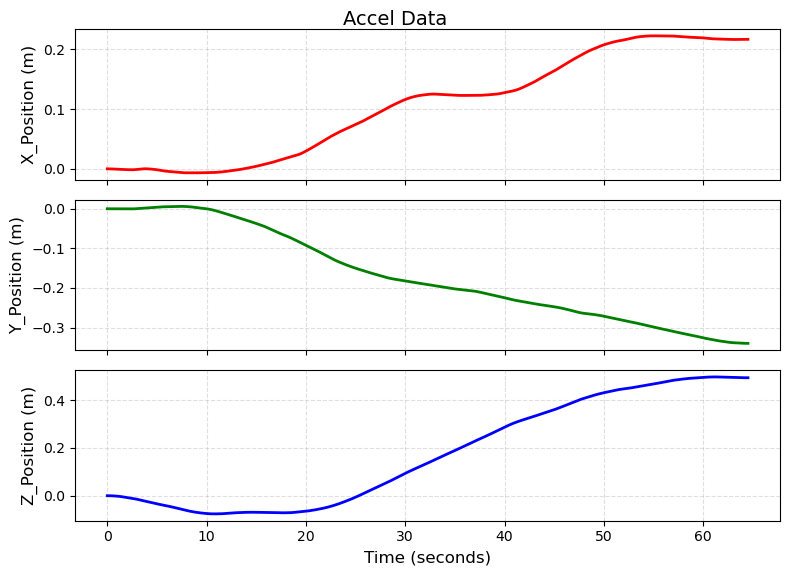

In [7]:
# Remove the bias from the signal
zero_mean_acc = zero_mean(filtered_acc_data)

# Take the second integral to obtain positon from acceleration
int_acc_data = integrate(zero_mean_acc, frequency = 120, times = 2, sensor_type = 'accel')

# Visualize the data
plot_xyz(int_acc_data, div_time = 120, tlabel = 'seconds', ylabel='Position (m)', sensor_type='accel')

Figure 9. Resulting positional data obtained from integrating the zero-mean acceration signal twice.

Once again, when the bias is removed, there is much more reliable positional data obtained. That being said, drift is still present due to noise and bias instability (Table 2). This once again shows that one signal cannot be used to solely determine segment position, supporting the need for sensor fusion algorithms.

*Magnetometer Error Visualization:*

Finally, magnetometers within IMUs are also prone to errors. Notably, due to their inability to isolate the magnetic field of the earth, magnetometers can sense false changes in headings when exposed to magnetic field from electronics, metal, etc. To highlight this error source, a 25 second collection was completed while the IMU remained static on a desk. For the first 10-seconds, the IMU was untampered with. However, at the 10 second mark, an electronic was circulated around the sensor. This electronic interference was expected to yield false heading changes.


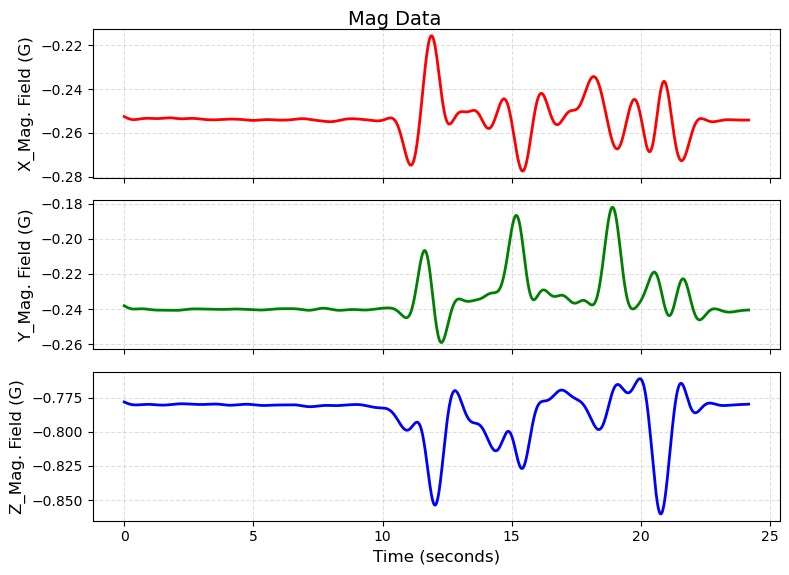

In [8]:
# Load the mag collection file
data_mag = csv2zoo_data('data/mag_field.csv')

# Filter the data using a low pass filter
filtered_mag_data = filter_data(data_mag, cutoff = 1, sample_frequency = 60, sensor_type = 'mag')

# Visualize the data
plot_xyz(filtered_mag_data, div_time = 60, tlabel = 'seconds', ylabel="Mag. Field (G)", sensor_type = 'mag')

Figure 10. Heading data obtained from an IMU both with (seconds 10-25) and without (seconds 0-10) electrical interference

Heading is seen to shift when the electric field produced by the electronic is introduced (at approximately the ten-second mark). These results highlight why magnetometer data cannot blindly be used to correct for errors in sensor heading, especially as biomechanical laboratories often have large quantities of electronic equipment.

#### *Core Insight:* ####

IMUs contain three sensors, each with three orthogonal components. This robust sensing setup is required due to each sensor's limitations, and accurate determination of a sensor's orientation can only be done when data from each sensing system is considered. This is primarily done through sensor fusion algorithms, a topic that will be discussed later in the present notebook.

### Dynamic Motions ####

Now that the advantages and disadvantages of each of the IMUs three sensors has been discussed, a simple dynamic trial consisting of 45 seconds with sequential rotations around the sensor's Y, X, and Z axis will be processed. The main focus of this section will be to gain information about sensor orientation using information provided from each sensor independently.

Firstly, let's visualize the sensor's orientation during the collection:

*Note*: for this visualization function to work, the [imu-visualization](https://github.com/jlwry/imu-visualization) repository must be cloned on to the user's computer.

In [ ]:
visualize('data/LH_quat_rotation.csv','/Users/joshualowery/DataspellProjects/imu-visualization')

# visualize('data/LH_20250816_112514.csv','/Users/joshualowery/DataspellProjects/imu-visualization')

Original sampling rate: 120.0 Hz
Downsampled to: 30 Hz
Data duration: 45.60 seconds
Number of samples: 1369
Initial quaternions:
LH_quat_rotation: [ 0.74896056  0.01422888 -0.00348719 -0.66245288]


In [1]:
from biomechzoo.conversion.csv2zoo_data import csv2zoo_data
from utils.imu_functions import filter_data, plot_xyz, integrate, calibrate, quat_to_euler, simple_madgwick_filter, acc_orient, advanced_madgwick

#### Trying to work on walking data ####

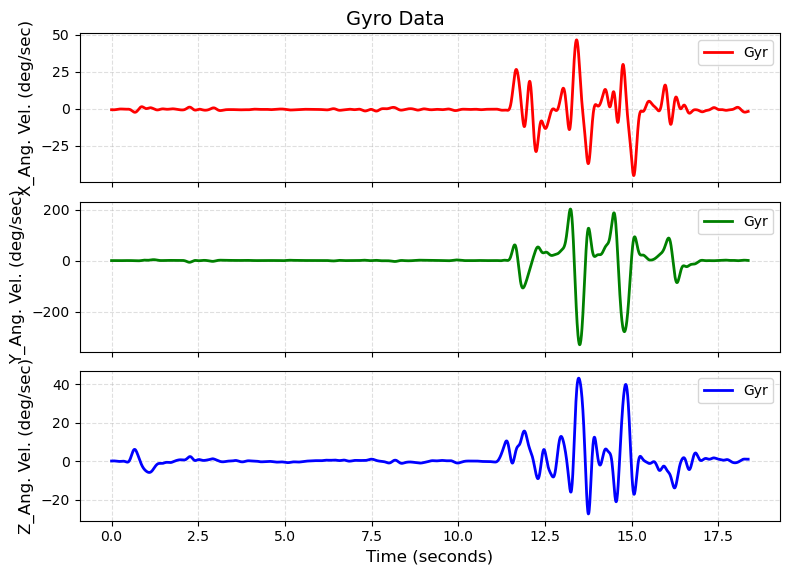

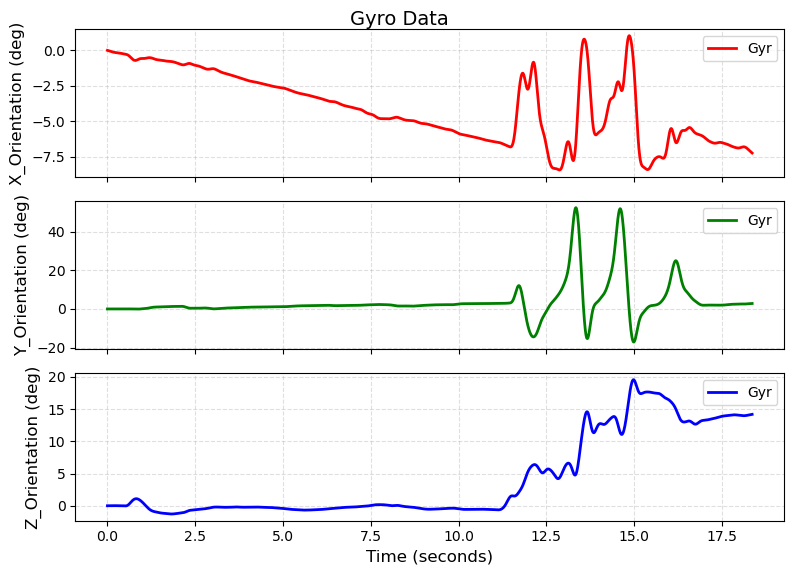

In [2]:
walk_data = csv2zoo_data('data/LH_20250816_112514.csv')

# Filter the data to get rid of obvious outliers and noise
filtered_gyro = filter_data(walk_data, cutoff = 4, sample_frequency = 120, sensor_type= 'gyro')
int_rot = integrate(filtered_gyro, frequency = 120, times = 1, sensor_type = 'gyro')

# Visualize the raw data
plot_xyz(filtered_gyro, div_time = 120, tlabel = 'seconds', ylabel="Ang. Vel. (deg/sec)", sensor_type = 'gyro')
plot_xyz([int_rot], div_time=120, tlabel = 'seconds', ylabel='Orientation (deg)', sensor_type=['gyro'])

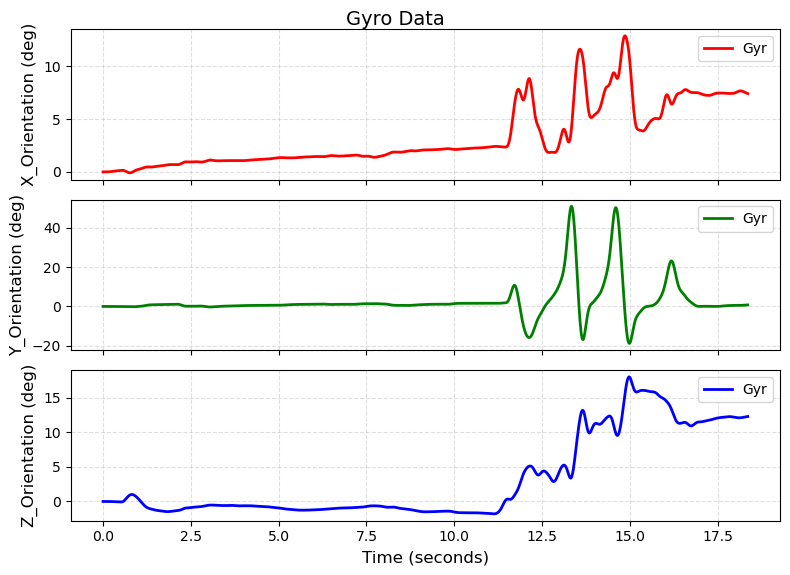

In [3]:
#load the static trial

static_filtered_gyro = {}
for ch in filtered_gyro: static_filtered_gyro[ch] = {'line': filtered_gyro[ch]['line'][:1]}

# calibrate the data (assuming the first data point is the static - ideally i would want a calibration trial)
cal_gyro = calibrate(filtered_gyro, static_filtered_gyro , sensor_type = 'gyro')

int_cal_gyro_data = integrate(cal_gyro, frequency = 120, times = 1, sensor_type = 'gyro')

plot_xyz(int_cal_gyro_data, div_time = 120, tlabel = 'seconds', ylabel='Orientation (deg)',sensor_type='gyro')

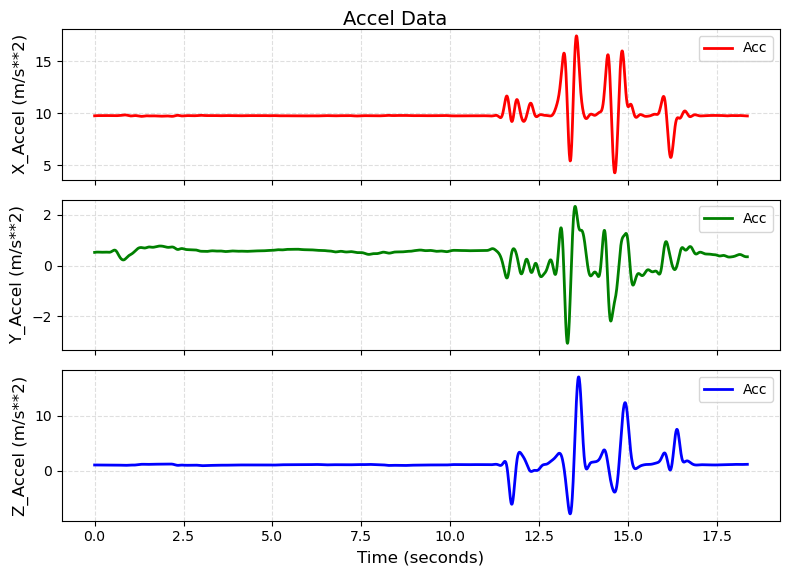

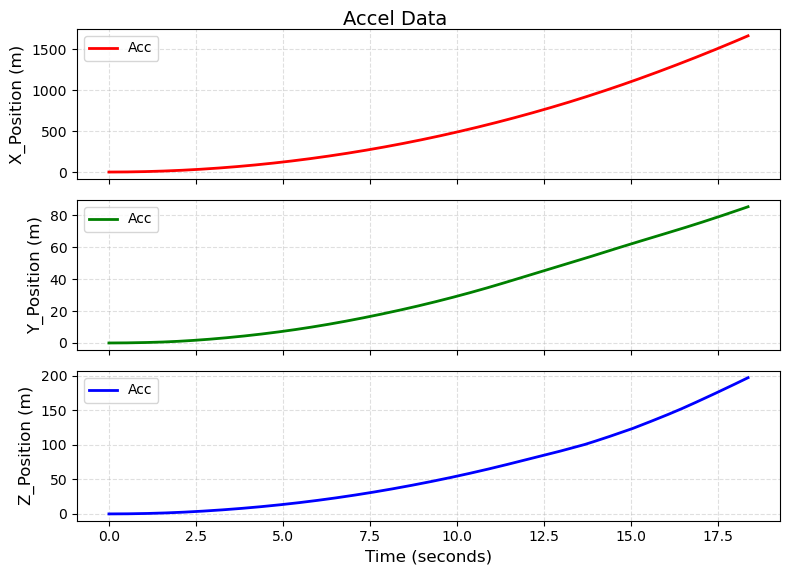

In [4]:
# Filter the data to get rid of obvious outliers and noise
filtered_accel = filter_data(walk_data, cutoff = 4, sample_frequency = 120, sensor_type= 'accel')

int_rot = integrate(filtered_accel, frequency = 120, times = 2, sensor_type = 'accel')
# Visualize the raw data
plot_xyz(filtered_accel, div_time = 120, tlabel = 'seconds', ylabel="Accel (m/s**2)", sensor_type = 'accel')
plot_xyz(int_rot, div_time=120, tlabel = 'seconds', ylabel='Position (m)', sensor_type='accel')

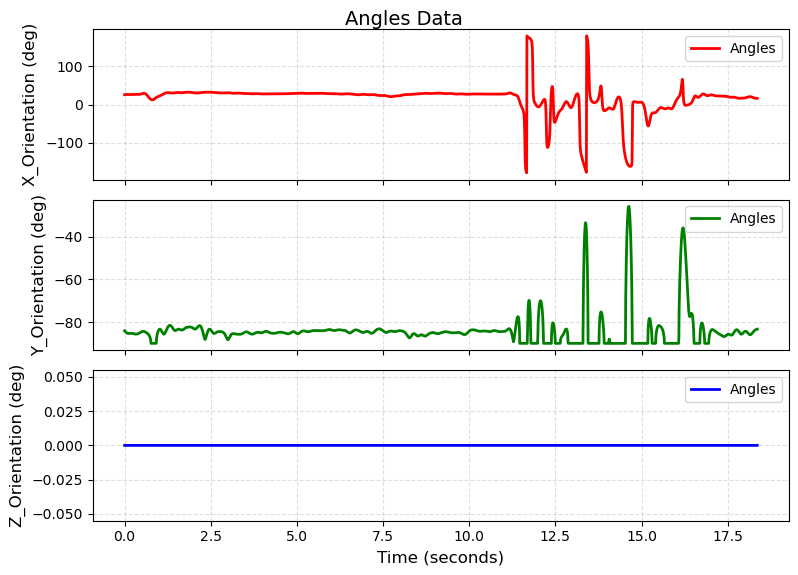

In [7]:
acc_angles = acc_orient(filtered_accel)
plot_xyz(acc_angles, div_time= 120, tlabel = 'seconds', ylabel='Orientation (deg)', sensor_type='angles')

#### Working on the raw rotation data ####

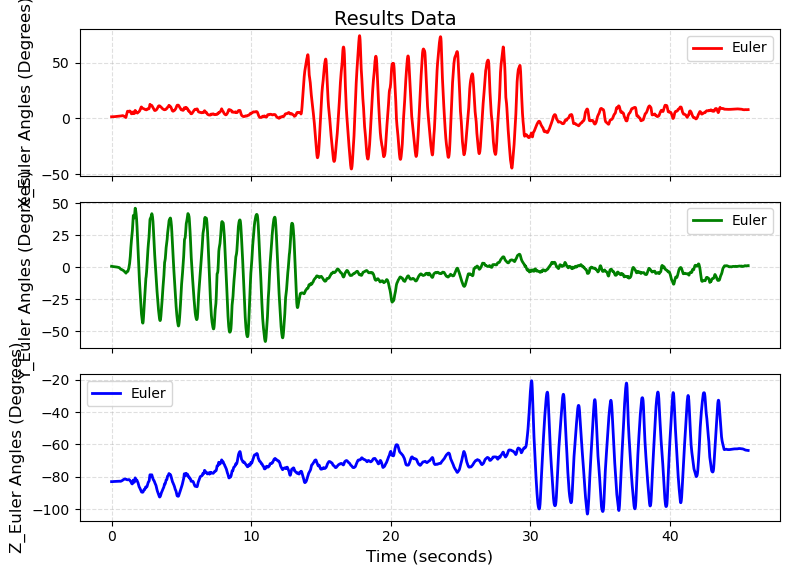

In [6]:
rotations = csv2zoo_data('data/euler_rotation.csv')

results = { 'Euler_X': rotations['Euler_X'], 'Euler_Y' : rotations['Euler_Y'], 'Euler_Z' : rotations['Euler_Z'] }

plot_xyz(rotations, div_time=120, tlabel= 'seconds', ylabel="Euler Angles (Degrees)", sensor_type='results')

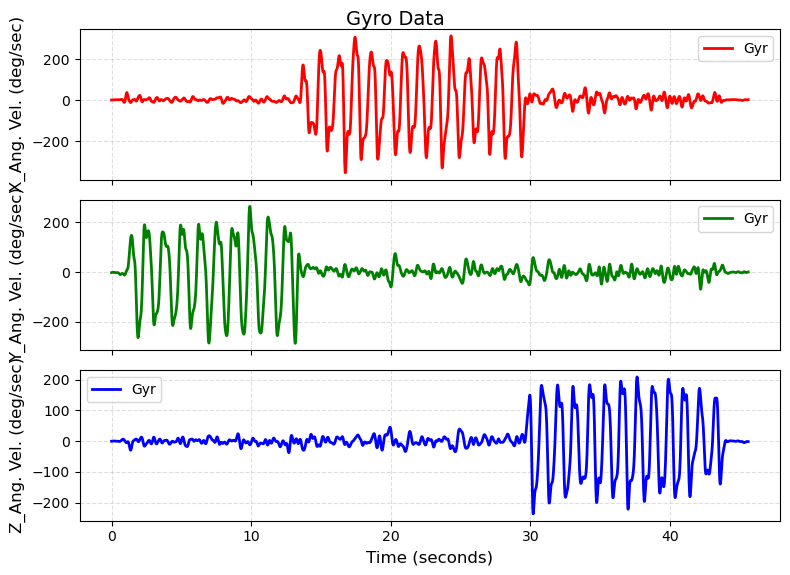

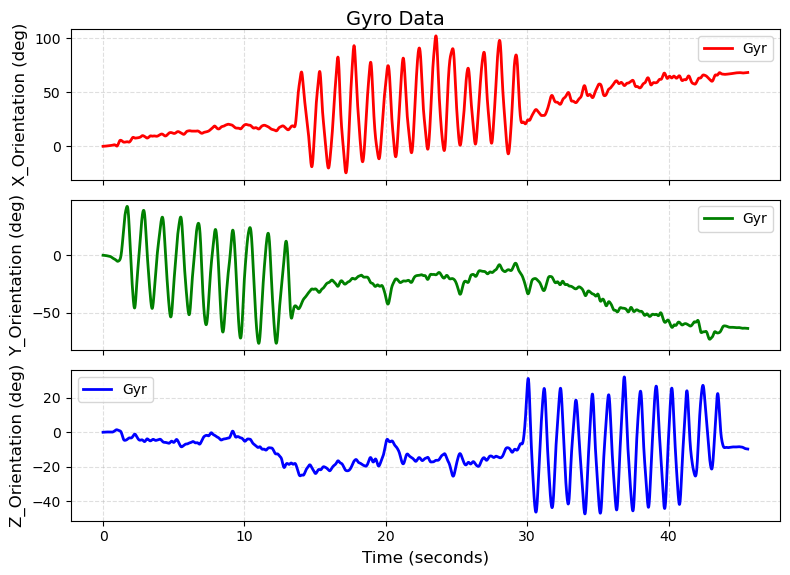

In [7]:
# Filter the data to get rid of obvious outliers and noise
filtered_gyro = filter_data(rotations, cutoff = 4, sample_frequency = 120, sensor_type= 'gyro')
int_rot = integrate(filtered_gyro, frequency = 120, times = 1, sensor_type = 'gyro')

# Visualize the raw data
plot_xyz(filtered_gyro, div_time = 120, tlabel = 'seconds', ylabel="Ang. Vel. (deg/sec)", sensor_type = 'gyro')
plot_xyz([int_rot], div_time=120, tlabel = 'seconds', ylabel='Orientation (deg)', sensor_type=['gyro'])

Figure 9. Orientation obtained from gyroscope raw data during a dynamic trial

Similar to the example shown above in the gyroscope specific section, there is drift that can be seen in the data. Since this is a dynamic trial, the data cannot have bias removed from simply subtracting the signal's mean. As such, a calibrate function was made to calculate the sensor bias from a static trial, and remove this directly from the dynamic trial.

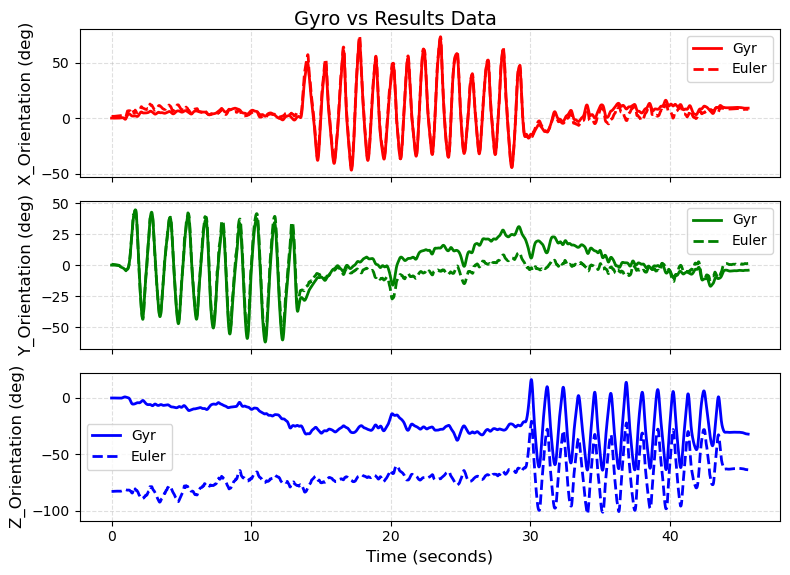

In [8]:
#load the static trial
data_static = csv2zoo_data('data/still_1min.csv')
static_filtered_gyro = filter_data(data_static, cutoff = 4, sample_frequency = 120, sensor_type = 'gyro')

# calibrate the data
cal_gyro = calibrate(filtered_gyro, static_filtered_gyro , sensor_type = 'gyro')

int_cal_gyro_data = integrate(cal_gyro, frequency = 120, times = 1, sensor_type = 'gyro')

plot_xyz([int_cal_gyro_data, results], div_time = 120, tlabel = 'seconds', ylabel='Orientation (deg)',sensor_type=['gyro', 'results'])


Figure 10. Orientation obtained from calibrated gyroscope data

Calibrating the data removed a significant amount of gyroscope drift. The sequential rotations can be clearly seen in each of the three axes.

#### Accelerometers #####

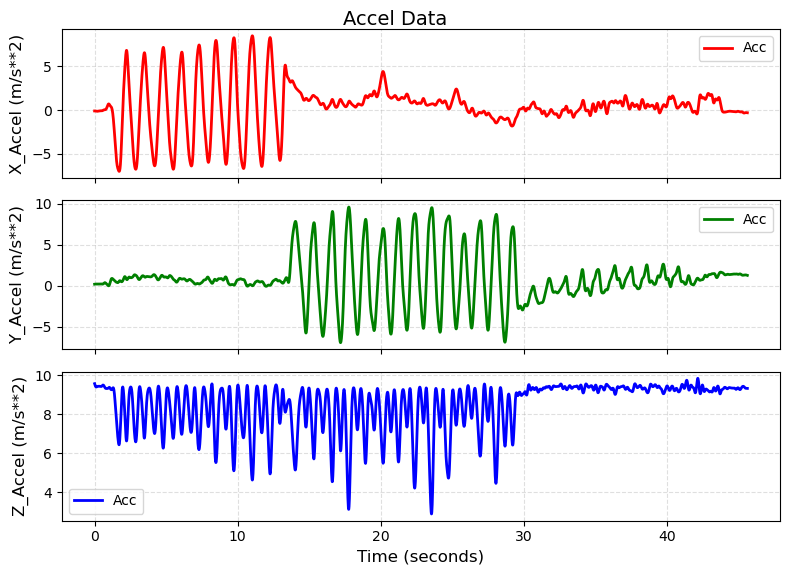

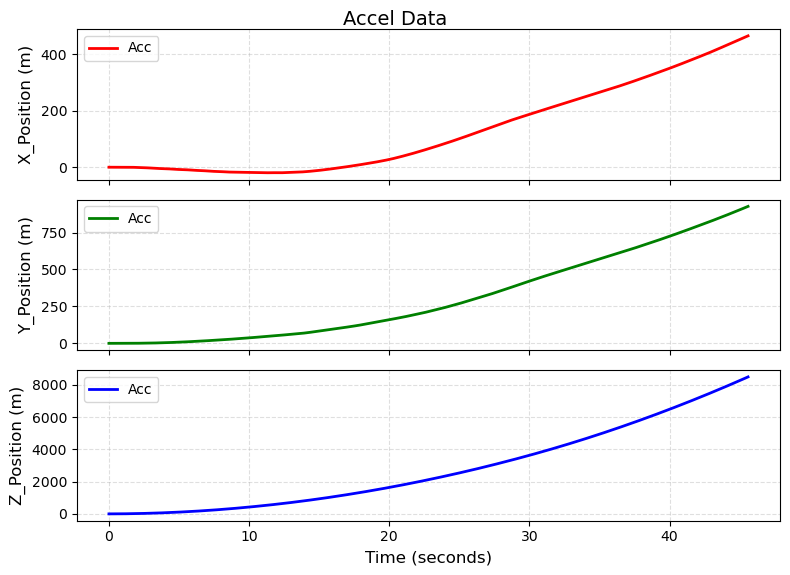

In [10]:
# Filter the data to get rid of obvious outliers and noise
filtered_accel = filter_data(rotations, cutoff = 4, sample_frequency = 120, sensor_type= 'accel')

int_rot = integrate(filtered_accel, frequency = 120, times = 2, sensor_type = 'accel')
# Visualize the raw data
plot_xyz(filtered_accel, div_time = 120, tlabel = 'seconds', ylabel="Accel (m/s**2)", sensor_type = 'accel')
plot_xyz(int_rot, div_time=120, tlabel = 'seconds', ylabel='Position (m)', sensor_type='accel')


Fig 11. The linear acceleration and position data obtained from an accelerometer during a dynamic trial.

Obtaining orientation from accelerometer data can be more tedious than gyroscopes. However, one thing to note from figure 11. is that gravitational acceleration, which would typically be in the z-axis, shifts between the x and y axes depending on the axis about which the sensor is rotating. Thus accelerometer data is able to provide information about the orientation of the sensor with respect to a global "down". It is worth noting that when the sensor is rotating about the z-axis, there is no change in direction of the sensor with respect to gravity, therefore, accelerometer data is only useful to compute orientation is 2 / 3 dimentions.

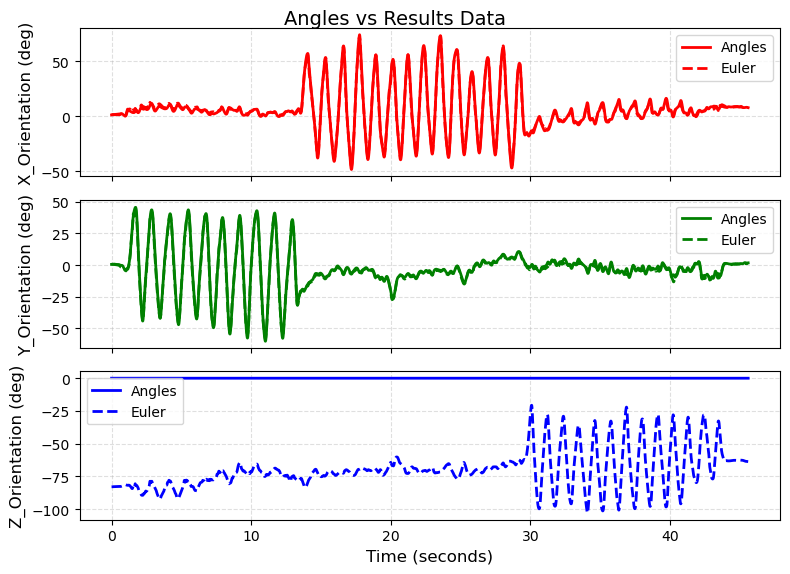

In [11]:
acc_angles = acc_orient(filtered_accel)
plot_xyz([acc_angles, results], div_time= 120, tlabel = 'seconds', ylabel='Orientation (deg)', sensor_type=['angles', 'results'])


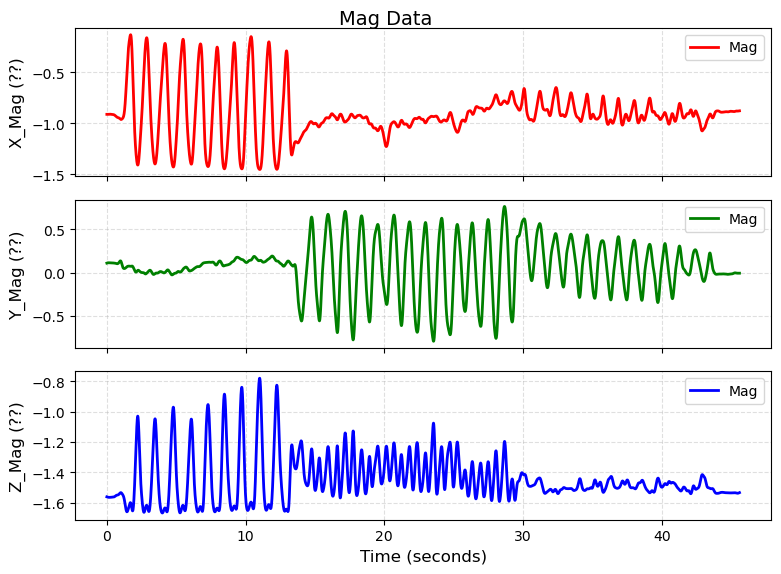

In [12]:
filtered_mag = filter_data(rotations, cutoff = 4, sample_frequency = 120, sensor_type= 'mag')
plot_xyz(filtered_mag, div_time = 120, tlabel = 'seconds', ylabel="Mag (??)", sensor_type = 'mag')

#### Sensor Fusion ####

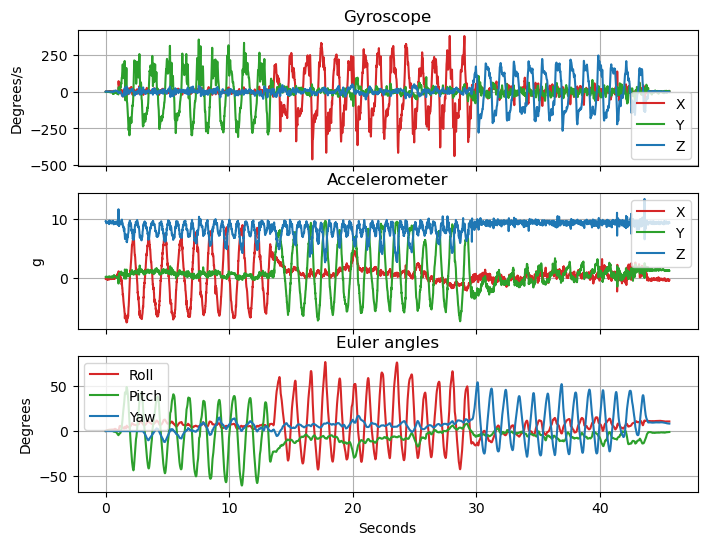

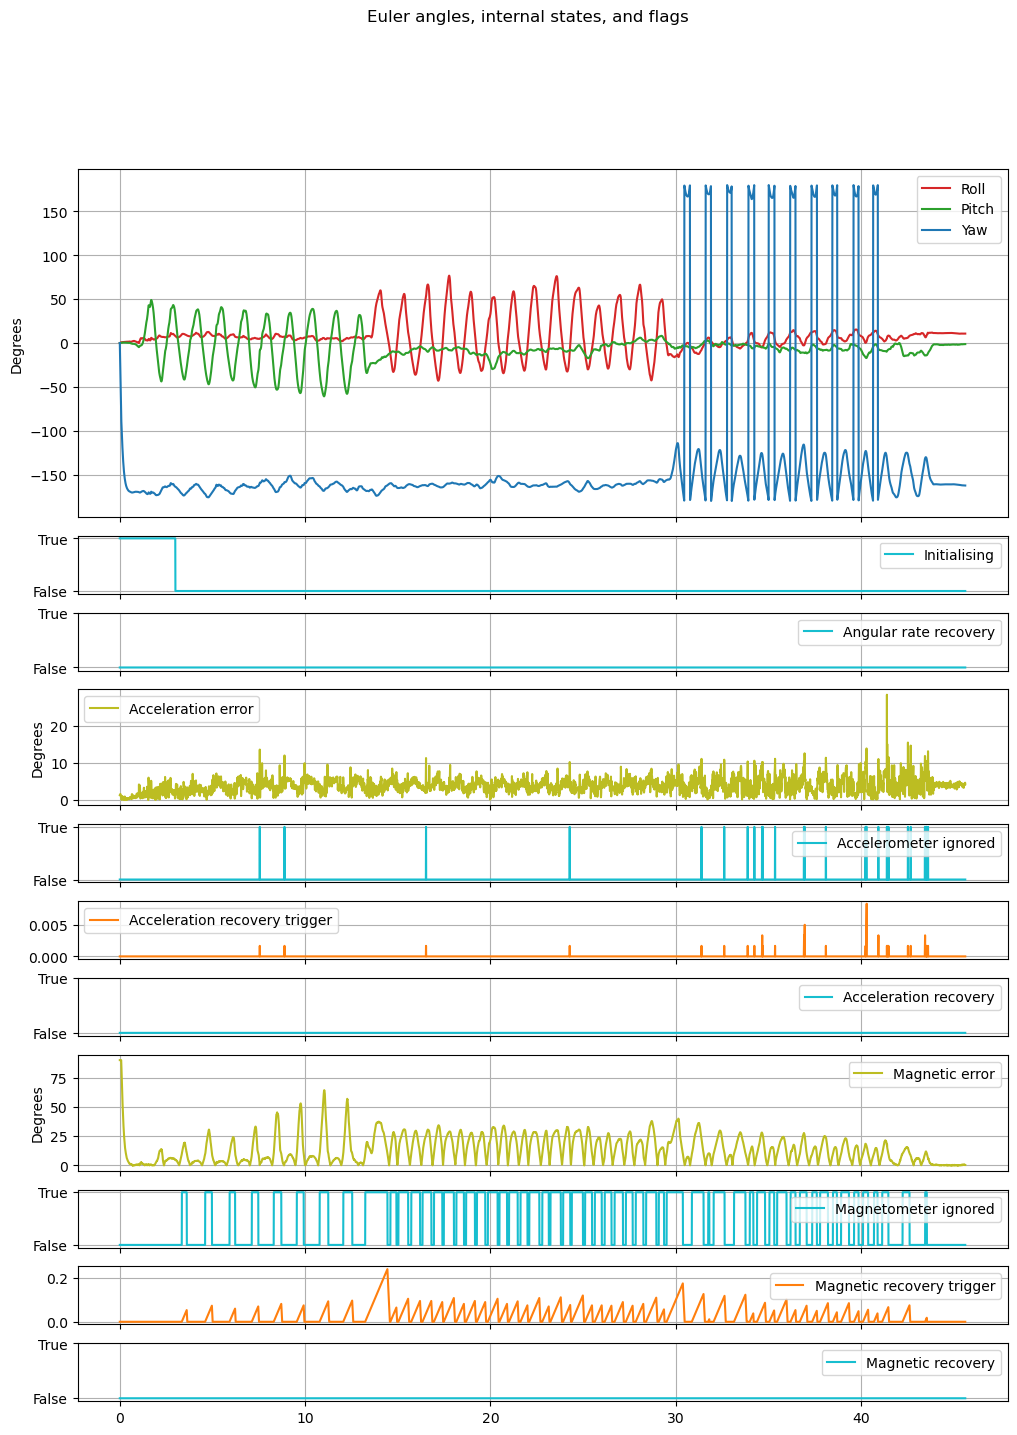

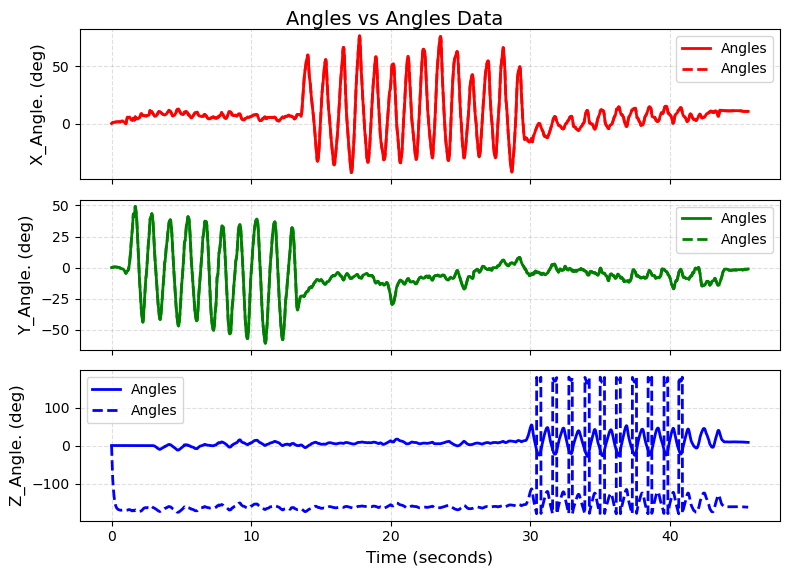

In [13]:
roll_simp, pitch_simp, yaw_simp = simple_madgwick_filter('data/euler_rotation.csv', show_plot= True)

roll_adv, pitch_adv, yaw_adv = advanced_madgwick('data/euler_rotation.csv', show_plot= True)

angles_simple = {
    'Angles_X': {'line': roll_simp},
    'Angles_Y': {'line': pitch_simp},
    'Angles_Z': {'line': yaw_simp},
    }

angles_adv = {
    'Angles_X': {'line': roll_adv},
    'Angles_Y': {'line': pitch_adv},
    'Angles_Z': {'line': yaw_adv},
    }

plot_xyz([angles_simple, angles_adv], div_time= 120, tlabel = 'seconds', ylabel="Angle. (deg)", sensor_type=['angles', 'angles'])


**<center> References</center>**

Woodman, O. J. (2007). An introduction to inertial navigation. University of Cambridge Computer Laboratory. https://doi.org/10.48456/tr-696

https://www.youtube.com/watch?v=LjeFZetmfYc&t=36s very good resource - goes through things very digestibly and mentions the issues with each sensor

https://www.youtube.com/watch?v=p7tjtLkIlFo very food resource for computing roll and pitch from using accelerometers


https://eater.net/quaternions good resources to visualize quaternions

---

<center> Prepared by Josh Lowery for EDKP 616 · McGill University · M.Sc. Biomechanics</center>

